In [ ]:
# Using California Housing Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Loading DataSet


In [ ]:
# 1. Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [ ]:

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:

# 2. Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


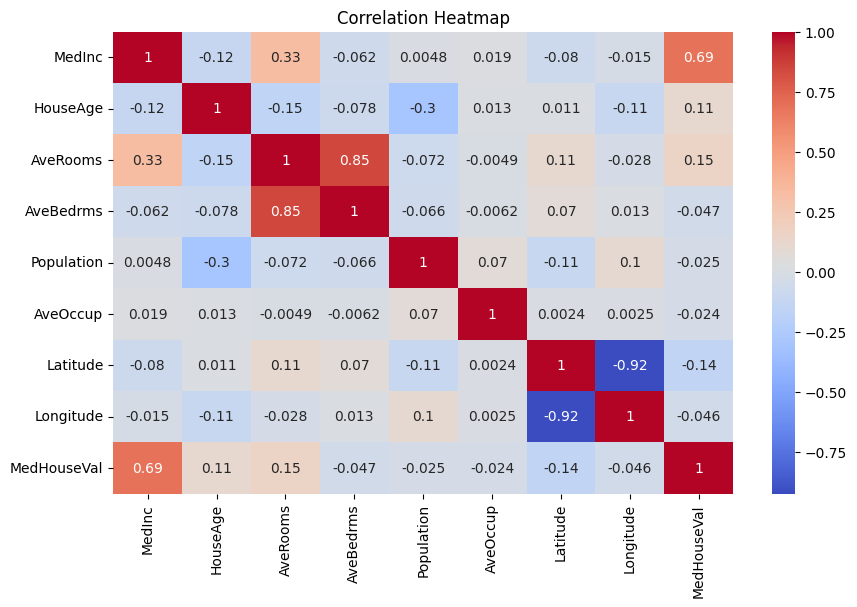

In [ ]:
# 3. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# 4. Feature selection
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]


In [ ]:

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# 6. Feature scaling for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# 7A. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
# 7B. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# 8. Evaluation
print("\nLinear Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))



Linear Regression Results:
RMSE: 0.7455813830127763
R² Score: 0.575787706032451


In [ ]:
print("\nRandom Forest Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))



Random Forest Results:
RMSE: 0.5039602414072009
R² Score: 0.8061857564039718


In [ ]:
# 9. Feature importance (Random Forest)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [ ]:
print("\nFeature Importances:\n", feature_importances)



Feature Importances:
       Feature  Importance
0      MedInc    0.525886
5    AveOccup    0.138055
6    Latitude    0.088647
7   Longitude    0.088307
1    HouseAge    0.054355
2    AveRooms    0.044449
4  Population    0.030693
3   AveBedrms    0.029608


/tmp/ipython-input-2186874240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


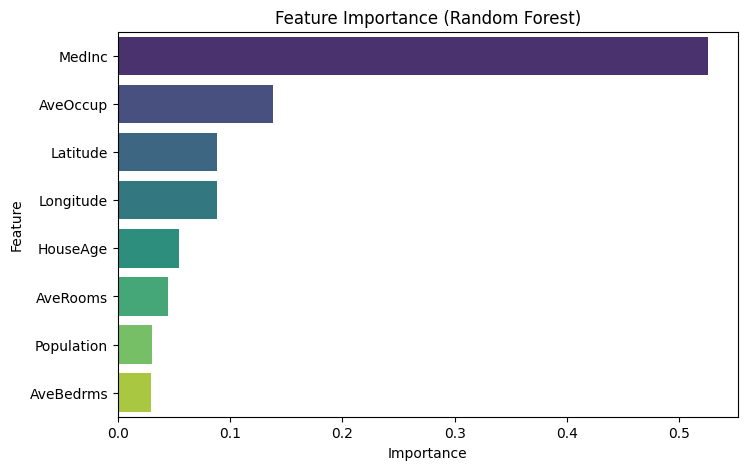

In [ ]:
# 10. Bar plot of feature importances
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

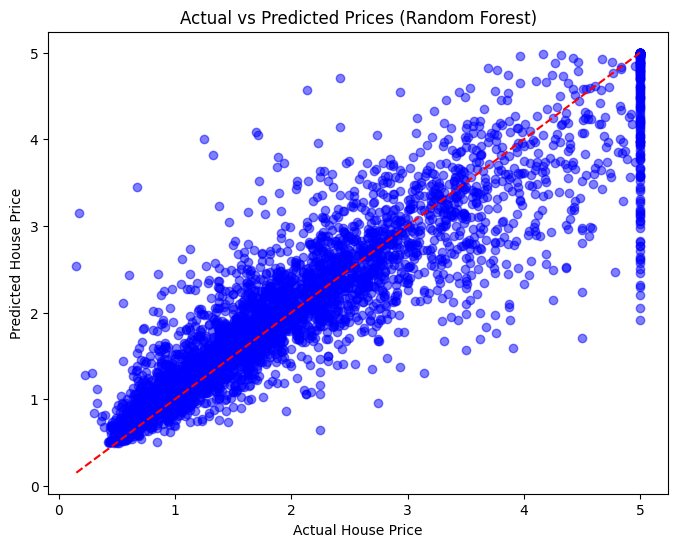

In [ ]:
# 11. Actual vs Predicted - Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()


In [ ]:
# 12. Compare models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})


In [ ]:
print("\nModel Comparison:\n", results)


Model Comparison:
                Model      RMSE  R² Score
0  Linear Regression  0.745581  0.575788
1      Random Forest  0.503960  0.806186


In [ ]:
import joblib

# Pick the best model based on R² Score
if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_lr):
    best_model = rf
    model_name = "RandomForestRegressor"
else:
    best_model = lr
    model_name = "LinearRegression"

print(f"\nBest Model Selected: {model_name}")

# Save model
joblib.dump(best_model, "best_housing_model.pkl")

# For Google Colab: download the model file
from google.colab import files
files.download("best_housing_model.pkl")




Best Model Selected: RandomForestRegressor


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>